# Daily and Monthly statistics

This notebook will demonstrate how to use the earthkit libraries to access some ERA5 data, reduce the date to daily (or monthly) time steps and plot the data.

For this exercise we will use the earthkit-data package to access the data, earthkit-climate to calculate the daily(/mothly) statistics and earthkit-maps to plot the results.

The earthkit-climate routines are *currently* based on xarray, hence they return raw xarray objects. *This may change in future versions of Earthkit*.

In [1]:
import numpy as np # Everyone loves a numpy!

import earthkit as ek
# To make our life easier, we import the aggregate subpackage directly
from earthkit.climate import aggregate as ek_aggregate

DOWNLOAD_FROM_CDS = False
LOCAL_DATA_DIR = "../test_data/"

## Request some data from the CDS

For this example we are going to use the first 3 months of 2015

In [2]:
cds_dataset_name = 'reanalysis-era5-single-levels'

# We use an Earthkit bounding box object to describe our area,
# this clears up any lack of clarity of the order of: North, South, East, West.
area = ek.data.utils.bbox.BoundingBox(north=80, south=20, west=-30, east=100)
cds_request = {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '2015',
        'month': [
            '01', '02', '03',
            # '04', '05', '06',
            # '07', '08', '09',
            # '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        "area": area
}

if DOWNLOAD_FROM_CDS:
    #era5_T2M_data = ek.data.from_source("cds", cds_dataset_name, cds_request)

    cds_request.update({
        "variable": "total_precipitation",
        "format": "netcdf"
    })
    era5_TP_data = ek.data.from_source("cds", cds_dataset_name, cds_request)

    # # Save for next time
    # era5_T2M_data.save(f"{LOCAL_DATA_DIR}/era5_t2m_Europe_2015_JanFebMarch.grib")
    # era5_TP_data.save(f"{LOCAL_DATA_DIR}/era5_tp_Europe_2015_JanFebMarch.nc")
else:
    era5_T2M_data = ek.data.from_source("file", f"{LOCAL_DATA_DIR}/era5_t2m_Europe_2015_JanFebMarch.grib")
    era5_TP_data = ek.data.from_source("file", f"{LOCAL_DATA_DIR}/era5_tp_Europe_2015_JanFebMarch.nc")


View the data object in the format that you prefer:

In [3]:
# As an xarray:
era5_T2M_data.to_xarray()
# # As a fieldlist
# era5_data.ls()
# # As a numpy array:
# era5_data.to_numpy()

<xarray.Dataset>
Dimensions:     (number: 1, time: 2160, step: 1, surface: 1, latitude: 241,
                 longitude: 521)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-03-31T23:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-12T10:50 GRIB to CDM+CF via cfgrib-0.9.1...

## Calculate the daily statistics

### Daily mean

First we calculate the daily mean of the 2m air temperature

In [4]:
era5_daily_mean = ek_aggregate.temporal.daily_mean(era5_T2M_data)
era5_daily_mean

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                time: 90)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-03-31
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 242...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-12T10:50 GRIB to CDM+CF via cfgrib-0.9.1...

### Monthly Mean

In [5]:
era5_monthly_mean = ek_aggregate.temporal.monthly_mean(era5_T2M_data)
era5_monthly_mean

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                time: 3)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2015-01-31 2015-02-28 2015-03-31
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 243...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-12T10:50 GRIB to CDM+CF via cfgrib-0.9.1...

### Different time zone

ERA5 data is provided with a time dimension local the UTC, hence the daily statistics are generally only
useful to locations in that time zone. It is possible to provide a time shift if you are more interested in
a time zone away from UTC.

The following calculates the daily mean relative to a timezone 12 hours ahead of UTC. 
Please be aware that your data request should probably be modified to account for the
additional timesteps required for the start/end days.
In the example below we have one additional day in our returned object because the first
and last days are now made up of partial days and should be omitted from further analysis.

In [6]:
era5_daily_mean_12 = ek_aggregate.temporal.daily_mean(era5_T2M_data, time_shift={'hours': 12})
era5_daily_mean_12

<xarray.Dataset>
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 241, longitude: 521,
                time: 91)
Coordinates:
  * number     (number) int64 0
  * step       (step) timedelta64[ns] 00:00:00
  * surface    (surface) float64 0.0
  * latitude   (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-04-01
Data variables:
    t2m        (time, number, step, surface, latitude, longitude) float32 242...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-12T10:50 GRIB to CDM+CF via cfgrib-0.9.1...

### A rolling average

Rolling reductions calculate the statistic over a given window, this is useful for removing diurnal/seasonal
cycles. Here we calculate the rolling mean over a window of 24 time steps.

In [7]:
era5_rolling = ek_aggregate.rolling_reduce(
    era5_T2M_data, time=24, center=True,
)
era5_rolling

<xarray.Dataset>
Dimensions:     (number: 1, time: 2160, step: 1, surface: 1, latitude: 241,
                 longitude: 521)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-03-31T23:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(2160, 1), meta=np.ndarray>
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 dask.array<chunksize=(1, 2159, 1, 1, 241, 521), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-12T10:50 GRIB to CDM+CF via cfgrib-0.9.1...

### Plot a point location to see the different aggregation methods

The **earthkit**'s graphical plotting library is not yet available, but because our methods return an xarray object we can use xarray's inbuilt matplotlib methods for this demonstration.

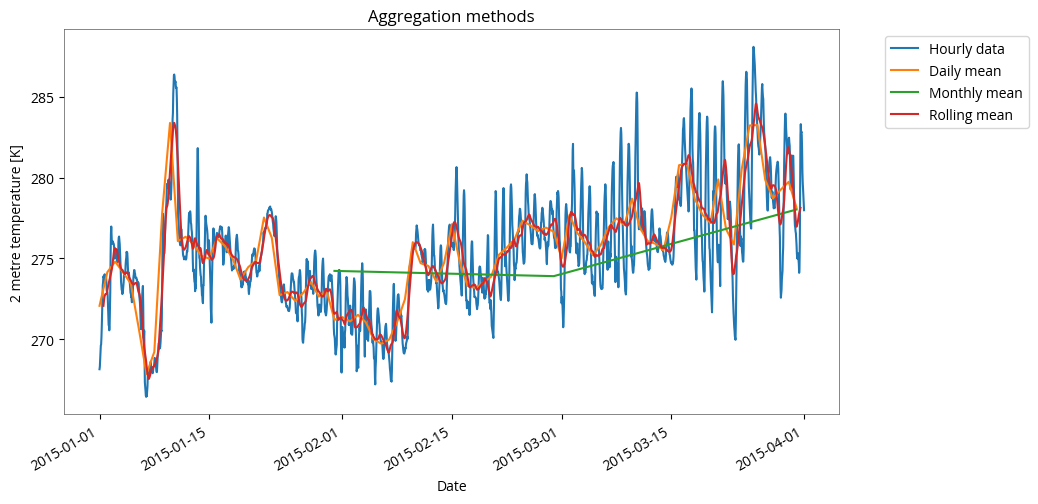

In [8]:
import matplotlib.pyplot as plt

# Location to extract (Brno)
location = {
    "latitude": 49.25,
    "longitude": 16.5
}

fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

era5_T2M_data.to_xarray().t2m.sel(**location).plot(label='Hourly data', ax=axis)
era5_daily_mean.t2m.sel(**location).plot(label='Daily mean', ax=axis)
era5_monthly_mean.t2m.sel(**location).plot(label='Monthly mean', ax=axis)
# era5_daily_mean_12.t2m.sel(**location).plot(label='Daily mean (+12 hours)', ax=axis)
era5_rolling.t2m.sel(**location).plot(label='Rolling mean', ax=axis)
axis.legend(loc='upper left', bbox_to_anchor=(1.05,1.))
axis.xaxis.set_label_text("Date")
axis.set_title("Aggregation methods")
plt.show()

## Daily accumulations

For some variables, e.g. total precipitation, daily accumulations are useful.

In [9]:
tp_accumulation = ek_aggregate.temporal.daily_sum(era5_TP_data)
# tp_accumulation = ek_aggregate.temporal.monthly_sum(era5_TP_data)
tp_accumulation

<xarray.Dataset>
Dimensions:    (longitude: 521, latitude: 241, time: 90)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-03-31
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 241, 521), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-12 08:39:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In future version of **earthkit** we intend to have methods for understanding and converting units. However,
as we are returning xarray(-like) object, we can use off the shelf packages to handle this situation.

Here we use cf_units, this package is already used behind the scenes by earthkit-maps, hence is available in
our environment

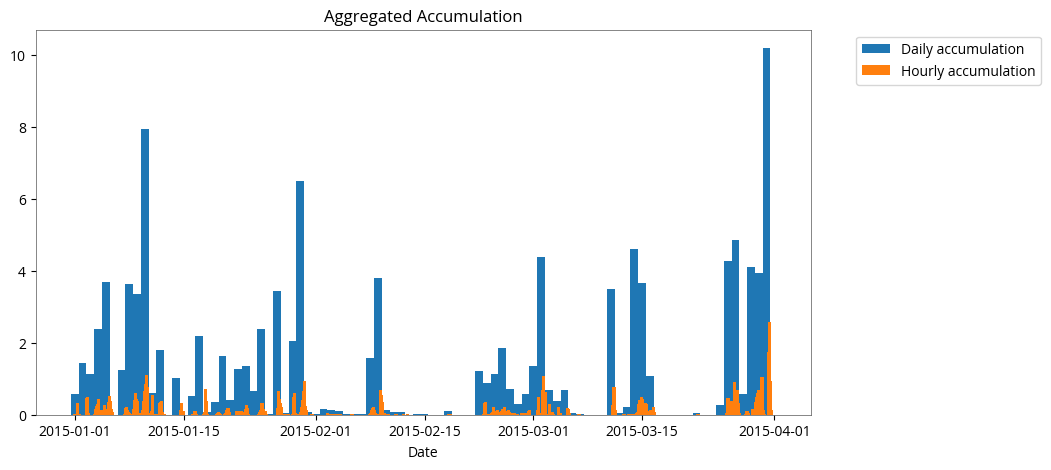

In [10]:
import cf_units

fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

daily_data = tp_accumulation.tp.sel(**location)
d_units = cf_units.Unit(daily_data.units)
daily_data.values = d_units.convert(daily_data.values, 'mm')

axis.bar(daily_data.time, daily_data, label='Daily accumulation', width=1.)

hourly_data = era5_TP_data.to_xarray().tp.sel(**location)
h_units = cf_units.Unit(hourly_data.units)
hourly_data.values = h_units.convert(hourly_data.values, 'mm')
axis.bar(hourly_data.time, hourly_data, label='Hourly accumulation', width=0.4)

axis.legend(loc='upper left', bbox_to_anchor=(1.05,1.))
axis.xaxis.set_label_text("Date")
axis.set_title("Aggregated Accumulation")
plt.show()